<a href="https://colab.research.google.com/github/GermanOmar/Composite2/blob/master/Flex_CompTi02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Machine Learning Approach for Mechanical Property Prediction of a Bio-epoxy Resin and Glass Fiber Composite Reinforced with Various Loadings of Titanium Dioxide Nanoparticles


## Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
#---------Scikit-learn Utilities---------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score as R2
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [3]:
!pip install lazypredict
warnings.filterwarnings("ignore")

In [4]:
pip install nbformat


## Upload database:

In [5]:
!git clone https://github.com/GermanOmar/Composite2

Cloning into 'Composite2'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 796.50 KiB | 12.45 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [6]:
#Experimental data
data = pd.read_table('/content/Composite2/DataFlex.txt')
data.describe()

,TiO2,UTS
count,45.000000,45.000000
mean,0.933333,420.625133
std,0.690849,26.031115
min,0.000000,364.370000
25%,0.500000,402.434400
50%,1.000000,426.312100
75%,1.500000,442.810000
max,2.000000,459.690000


In [7]:
df = data.copy()
df.columns = df.columns.str.strip()
df.head()

,TiO2,UTS
0,0.0,373.00
1,0.0,365.35
2,0.0,364.37
3,0.0,388.29
4,0.0,383.82


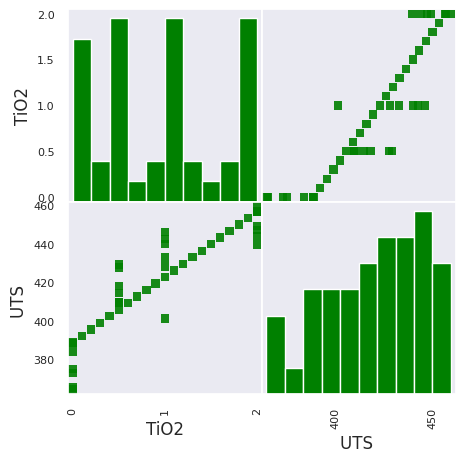

In [8]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='o', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (5,5),  c='green', hist_kwds={'color':['green']})

warnings.filterwarnings("ignore")

##Setting inputs - output:

In [9]:
X=data[['TiO2']]
Y=data['UTS '].values.reshape(-1, 1)


## Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 36  test samples: 9


In [11]:
YTR=np.mean(y_train)
YTR

np.float64(420.18596388888886)

In [12]:
YT=np.mean(y_test)
YT

np.float64(422.3818111111111)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [15]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(36, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 0
[LightGBM] [Info] Start training from score 420.185964
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped

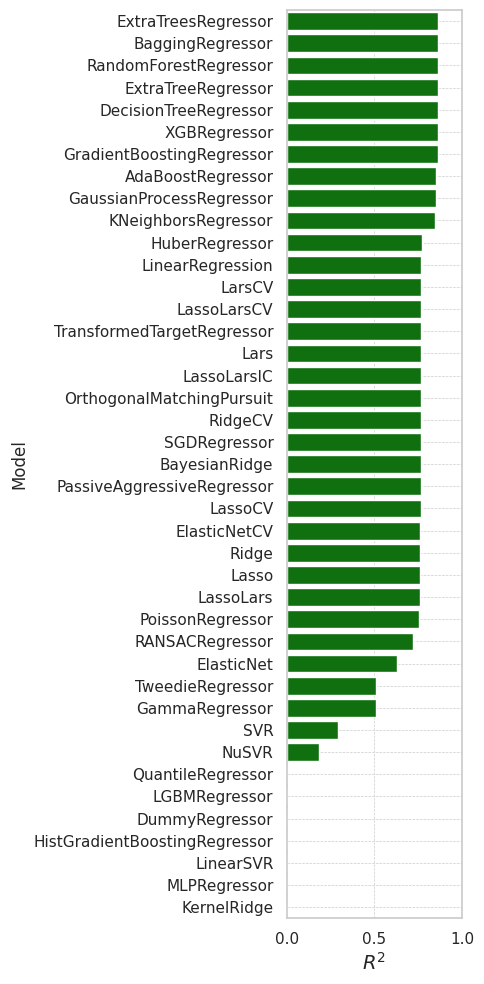

In [16]:
# Plotting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

import seaborn as sns

plt.style.use('seaborn-v0_8-white')
#palette = sns.color_palette("crest", len(mi_df))

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-v0_8-white')
#palette = sns.color_palette("crest", len(mi_df))
sns.set_theme(style="whitegrid")

predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
#palette = sns.color_palette("flare", len(corr_df))
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions, color='green')
ax.set(xlim=(0, 1))
plt.xlabel('$R^2$', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('lazy1.png', dpi=300)

plt.show()

# Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
#KERNEL
RFR=RandomForestRegressor(n_estimators=2000)

#START TRAINING
RFR.fit(X_train,y_train)
#PREDICTION

y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)

y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)

MSE_train = MSE(y_train, y_train_pred)
MSE_test = MSE(y_test, y_test_pred)
r2_train = R2(y_train, y_train_pred)
r2_test = R2(y_test, y_test_pred)
mae_train = MAE(y_train, y_train_pred)
mae_test = MAE(y_test, y_test_pred)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={MSE_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={MSE_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=4.8901, MSE=58.9726, R2=0.9022
Testing: MAE=8.8850, MSE=107.2619, R2=0.8804
----------------------------------------------------------------------------------------------------


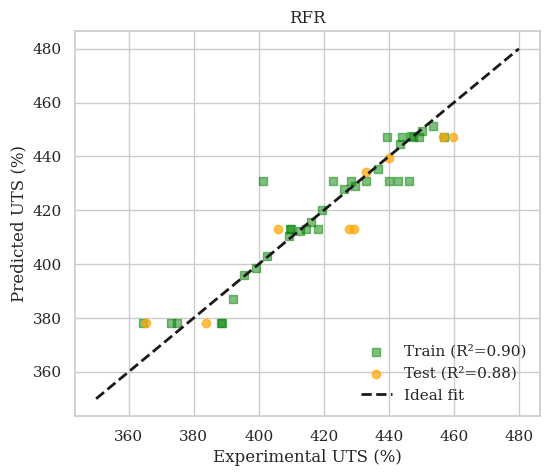

In [18]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green', marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
ax.plot([350, 480], [350, 480], 'k--', lw=2, label='Ideal fit')

ax.set_title("RFR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")


ax.legend(loc='lower right')

plt.show()

# XGBR

In [19]:
import pickle
import xgboost as xgb

# Change missing=None to missing=np.nan
# Assuming you want to use np.nan for missing values
import numpy as np

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             min_child_weight=1, missing=np.nan, n_estimators=1000, # Changed missing value to np.nan
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [20]:
# y_train_pred = xgbr.predict(X_train)
# y_test_pred = xgbr.predict(X_test)

y_pred_train = xgbr.predict(X_train)
y_pred_test = xgbr.predict(X_test)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
r2_train = R2(y_train, y_pred_train)
r2_test = R2(y_test, y_pred_test)
mae_train = MAE(y_train, y_pred_train)
mae_test = MAE(y_test, y_pred_test)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={mse_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={mse_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=4.3937, MSE=57.8226, R2=0.9041
Testing: MAE=9.4296, MSE=109.1103, R2=0.8784
----------------------------------------------------------------------------------------------------


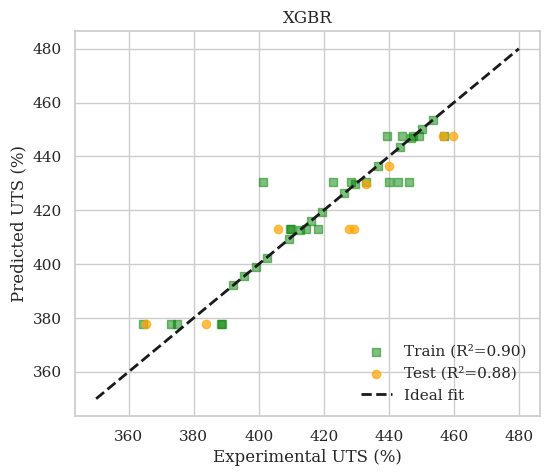

In [21]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green', marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
ax.plot([350, 480], [350, 480], 'k--', lw=2, label='Ideal fit')

ax.set_title("XGBR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")


ax.legend(loc='lower right')

plt.show()

# MLP

In [22]:
from sklearn.neural_network import MLPRegressor

MLP =MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=4, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=4321, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)



In [23]:
y_pred_train = MLP.predict(X_train)
y_pred_test = MLP.predict(X_test)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
r2_train = R2(y_train, y_pred_train)
r2_test = R2(y_test, y_pred_test)
mae_train = MAE(y_train, y_pred_train)
mae_test = MAE(y_test, y_pred_test)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={mse_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={mse_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=6.5383, MSE=72.7723, R2=0.8793
Testing: MAE=9.2354, MSE=154.5057, R2=0.8278
----------------------------------------------------------------------------------------------------


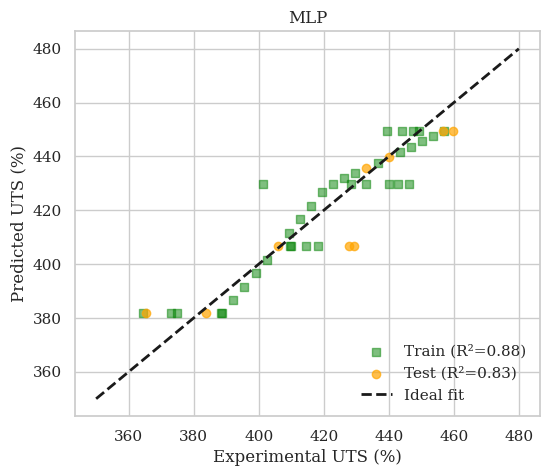

In [24]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green', marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
ax.plot([350, 480], [350, 480], 'k--', lw=2, label='Ideal fit')

ax.set_title("MLP")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")


ax.legend(loc='lower right')

plt.show()

# Gaussian Process Regressor

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-2, 1e2)) * RBF(10, (1e-2, 1e2))

GP=GPR(kernel=kernel, n_restarts_optimizer=20, alpha=0.001, normalize_y=True)

#START TRAINING
GP.fit(X_train, y_train)
#PREDICTION
y_train_pred = GP.predict(X_train)
y_test_pred = GP.predict(X_test)

y_pred_train = GP.predict(X_train)
y_pred_test = GP.predict(X_test)

MSE_train = MSE(y_train, y_train_pred)
MSE_test = MSE(y_test, y_test_pred)
r2_train = R2(y_train, y_train_pred)
r2_test = R2(y_test, y_test_pred)
mae_train = MAE(y_train, y_train_pred)
mae_test = MAE(y_test, y_test_pred)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={MSE_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={MSE_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=4.4427, MSE=57.8330, R2=0.9041
Testing: MAE=9.4476, MSE=109.9232, R2=0.8775
----------------------------------------------------------------------------------------------------


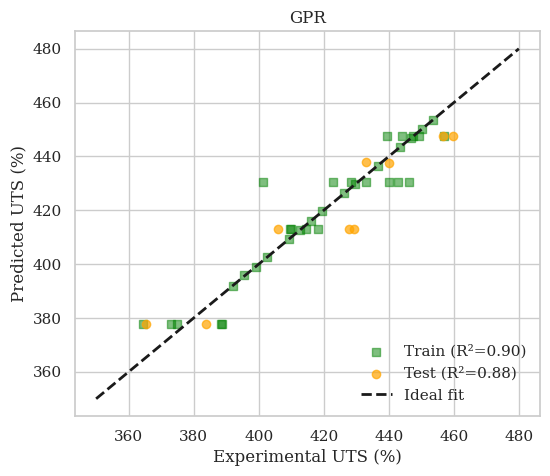

In [26]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green', marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
ax.plot([350, 480], [350, 480], 'k--', lw=2, label='Ideal fit')

ax.set_title("GPR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")


ax.legend(loc='lower right')

plt.show()

# Cross-validation

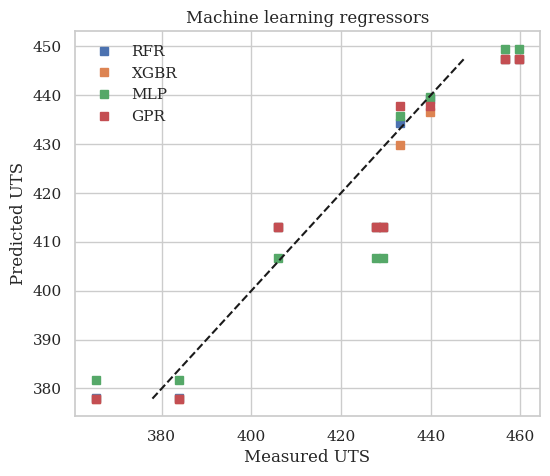

In [27]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

y1=RFR.predict(X_test)
y2=xgbr.predict(X_test)
y3=MLP.predict(X_test)
y4=GP.predict(X_test)

#Plots
models = [ RFR, xgbr, MLP, GP]
labels = ['RFR', 'XGBR', 'MLP', 'GPR']

fig = plt.figure()
fig.set_size_inches((6,5))

for mod, label in zip( models, labels):
  y_pred = mod.predict(X_test)
  plt.plot(y_test, y_pred, 's' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')


plt.legend()
plt.ylabel('Predicted UTS')
plt.xlabel('Measured UTS')
plt.title("Machine learning regressors")
print()

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ RFR, xgbr, MLP, GP]
labels = ['RFR', 'XGBR', 'MLP', 'GPR']
IMS = []

print("--------------------------------------------------------------")
print("%15s | %8s | %8s | %8s" % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels):
  y_star_train = mod.predict(X_train)

  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)

  print("%15s | %.4f | %.4f | %.4f" % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() ))
print("--------------------------------------------------------------")

--------------------------------------------------------------
   ML algorithm |    CV-R2 |   CV-MSE |   CV-MAE
--------------------------------------------------------------
            RFR | 0.6228 | 127.9259 | 7.9661
           XGBR | 0.6066 | 136.9475 | 8.7164
            MLP | 0.6846 | 118.9573 | 8.2934
            GPR | 0.5442 | 163.1566 | 10.0338
--------------------------------------------------------------


# LeaveOneOut

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------------
# Assume your flex dataset is defined as:
# X = np.array([...]).reshape(-1, 1)  # TiO2 wt.%
# y = np.array([...])                 # Flexural strength (MPa)
# ----------------------------------------

loo = LeaveOneOut()

# Fix: Create a dictionary for models using labels and the models list
models_dict = dict(zip(labels, models))

results = {}

for name, model in models_dict.items():
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):

        # Split data
        X_train_loo, X_test_loo = X.iloc[train_idx], X.iloc[test_idx]
        y_train_loo, y_test_loo = Y[train_idx], Y[test_idx]

        # Standardize INSIDE CV loop (avoid leakage)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_loo)
        X_test_scaled = scaler.transform(X_test_loo)

        # Fit model
        # Reshape y_train_loo to be 1D for models like MLPRegressor
        if y_train_loo.ndim > 1 and y_train_loo.shape[1] == 1:
            model.fit(X_train_scaled, y_train_loo.ravel())
        else:
            model.fit(X_train_scaled, y_train_loo)

        # Predict
        prediction = model.predict(X_test_scaled)

        y_true.append(y_test_loo[0])
        y_pred.append(prediction[0])

    # Convert to arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} LOOCV Results:")
    print(f"  MAE: {metrics['MAE']:.3f}")
    print(f"  MSE: {metrics['MSE']:.3f}")
    print(f"  R2 : {metrics['R2']:.3f}")
    print("-" * 40)


RFR LOOCV Results:
  MAE: 7.284
  MSE: 95.741
  R2 : 0.855
----------------------------------------
XGBR LOOCV Results:
  MAE: 7.743
  MSE: 97.729
  R2 : 0.852
----------------------------------------
MLP LOOCV Results:
  MAE: 7.588
  MSE: 98.251
  R2 : 0.852
----------------------------------------
GPR LOOCV Results:
  MAE: 7.816
  MSE: 101.362
  R2 : 0.847
----------------------------------------


In [32]:
import nbformat

notebook_path = "/content/Composite2/Flex_CompTi02.ipynb"

nb = nbformat.read(notebook_path, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

nbformat.write(nb, notebook_path)